In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


https://twitter.com/nntaleb/status/944571891364302848



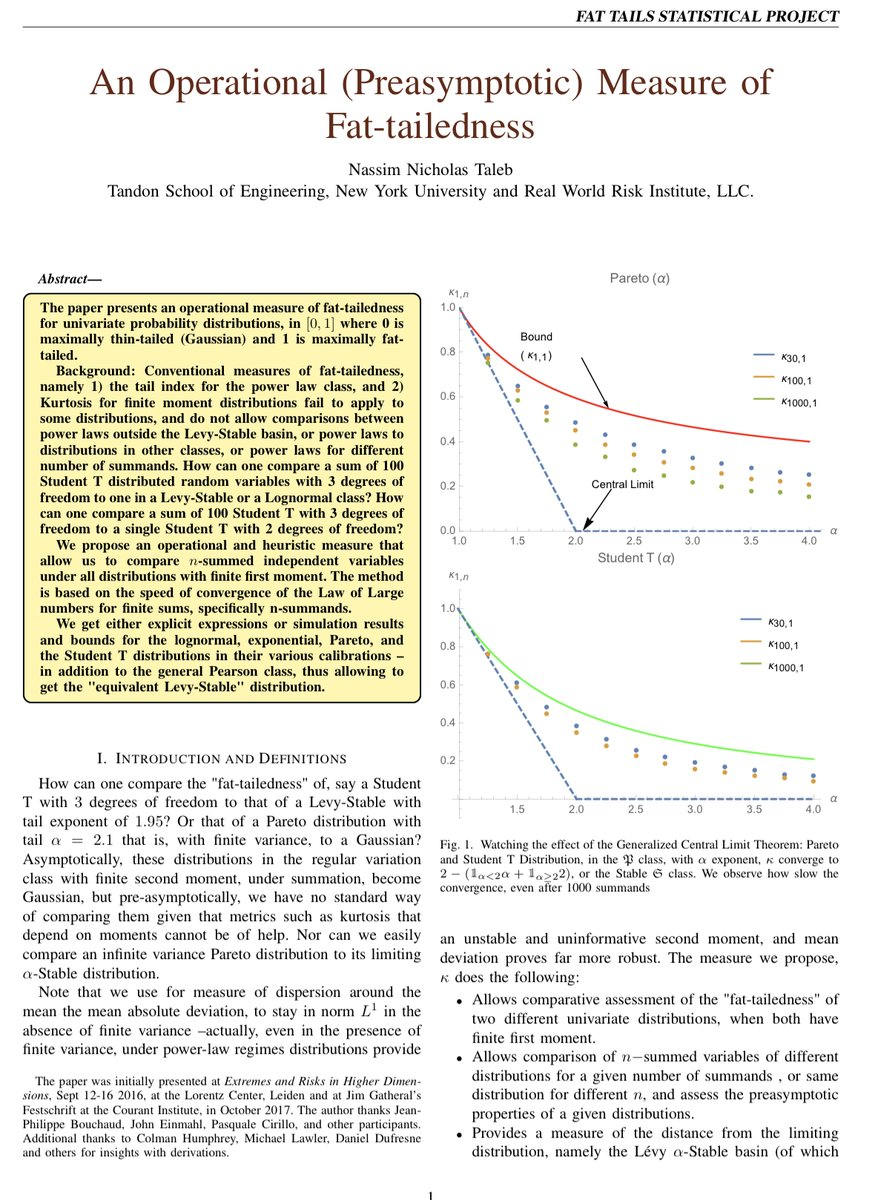
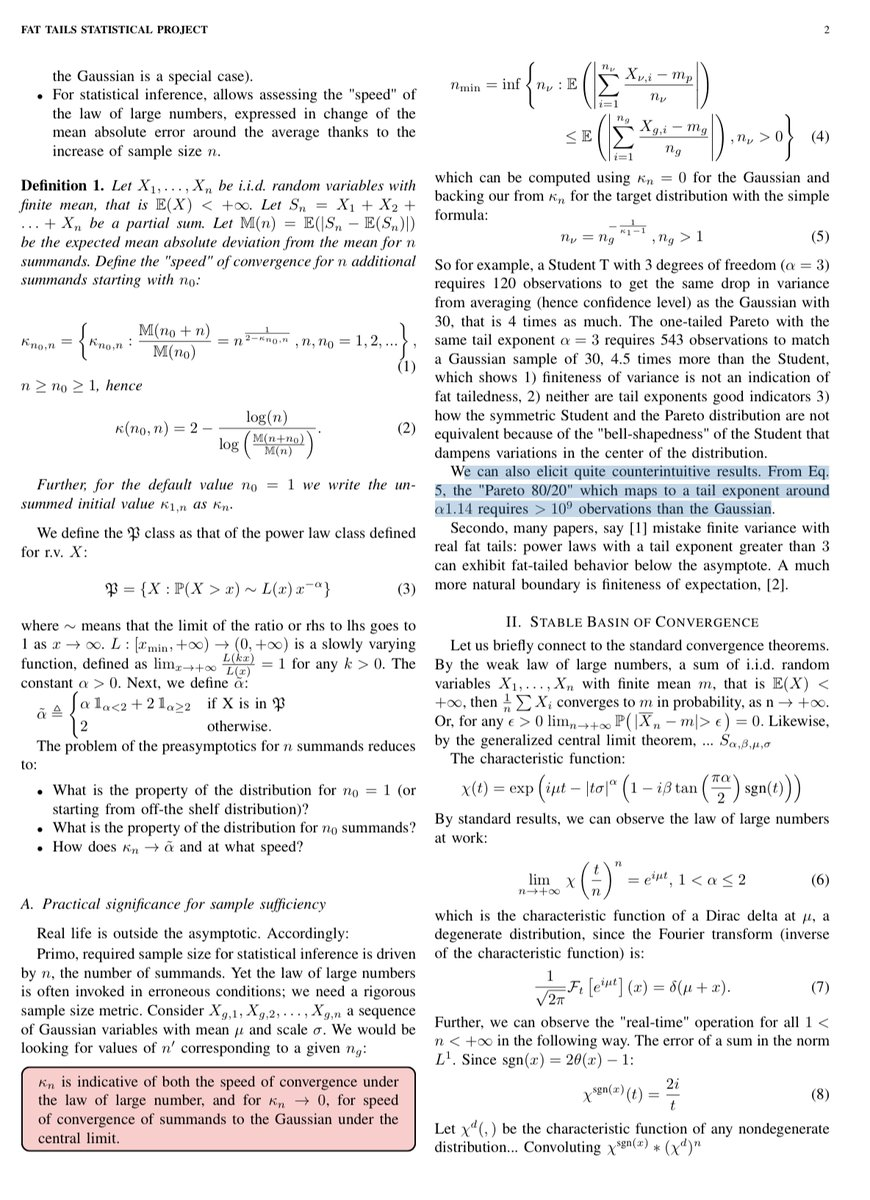

In [12]:
def kappas_cal(seq, n_sizes=20, min_size=1, max_size=500000, min_loops=2000, max_loops=200000, suffix=''):
    mean_est = np.mean(seq)
    M = []
    sizes = np.logspace(start=np.log10(min_size+0.5), stop=np.log10(len(seq)+0.5 if not max_size else max_size+0.5), 
                       num=n_sizes, endpoint=False).astype(int)
    loop_counts = [max(min_loops, int(max_loops / (size/min(sizes))**.5)) for size in sizes]
    for size, loops in zip(sizes, loop_counts):
        M += [np.mean([np.abs(np.sum(np.random.choice(seq, size=size, replace=True))-size*mean_est) for _ in range(loops)])]

    result = pd.DataFrame({'n' : np.array(sizes[1:]) - 1})
    col_name = 'k' + ('_'+str(suffix) if suffix else '')
    result[col_name] = 2. - (np.log(result['n'] + 1) / np.log(np.array(M[1:])/M[0]))
    
    return result

size = 5000000
np.random.seed(2)

t3_smpl = np.random.standard_t(df=3, size=size)
pareto21_smpl = np.random.pareto(a=2.1, size=size)
pareto8020_smpl = np.random.pareto(a=np.log(5)/np.log(4), size=size)

norm_smpl = np.random.randn(size)


In [13]:
t3_kappas = kappas_cal(t3_smpl, suffix='t3')
pareto21_kappas = kappas_cal(pareto21_smpl, suffix='pareto2.1')
pareto8020_kappas = kappas_cal(pareto8020_smpl, suffix='pareto8020')
norm_kappas = kappas_cal(norm_smpl, suffix='norm')

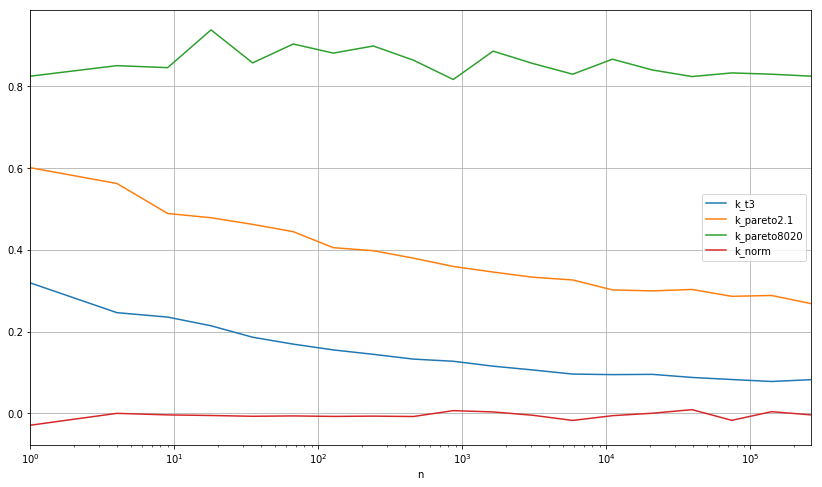

In [14]:
kappas = pd.merge(pd.merge(pd.merge(t3_kappas, pareto21_kappas, how='left', on='n'), 
                          pareto8020_kappas, how='left', on='n'), 
                 norm_kappas, how='left', on='n')

kappas.plot(x='n', y=kappas.columns[1:], logx=True, figsize=(14,8), grid=True)